Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving 1.jpg to 1 (1).jpg
Saving 2.jpg to 2 (1).jpg


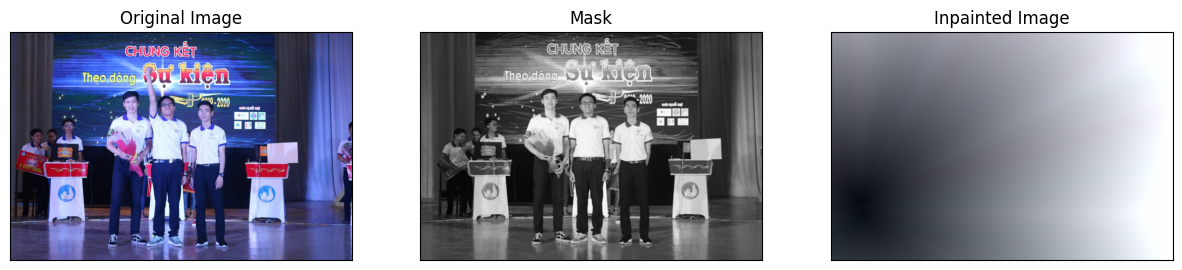

In [2]:
!pip install opencv-python-headless matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

def inpaint_image(image, mask):
    # Đảm bảo mặt nạ có cùng kích thước với hình ảnh
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Chuyển mặt nạ thành định dạng phù hợp
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # Sử dụng phương pháp inpainting của OpenCV
    dst = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

    # Hiển thị hình ảnh gốc, mặt nạ và hình ảnh sau khi inpainting
    plt.figure(figsize=(15,15))

    plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(132), plt.imshow(mask, cmap='gray')
    plt.title('Mask'), plt.xticks([]), plt.yticks([])

    plt.subplot(133), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    plt.title('Inpainted Image'), plt.xticks([]), plt.yticks([])

    plt.show()

# Tải lên hình ảnh gốc và mặt nạ từ máy tính
uploaded = files.upload()

# Lưu tên file hình ảnh
image_files = list(uploaded.keys())

# Đọc hình ảnh và mặt nạ
image = cv2.imread(image_files[0])
mask = cv2.imread(image_files[1])

# Thực hiện inpainting
inpaint_image(image, mask)
